Keyword 'SAS Advanced Analytics' 데이터에 'period' 컬럼이 없습니다.
API 응답 데이터: []
Keyword 'Microsoft Azure Active Directory' 데이터에 'period' 컬럼이 없습니다.
API 응답 데이터: []


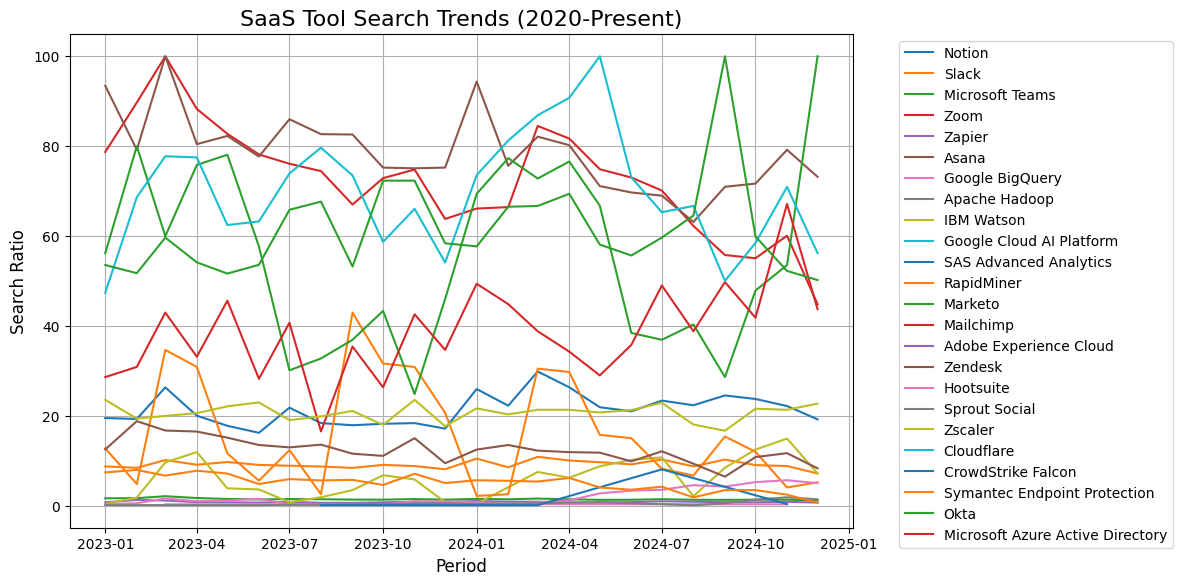

In [9]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import userdata

client_id = userdata.get('client_id')
client_secret = userdata.get('client_secret')

url = "https://openapi.naver.com/v1/datalab/search"

# 분석할 키워드 리스트
keywords = [
    "Notion", "Slack", "Microsoft Teams", "Zoom", "Zapier",
    "Asana", "Google BigQuery", "Apache Hadoop", "IBM Watson", "Google Cloud AI Platform",
    "SAS Advanced Analytics", "RapidMiner", "Marketo", "Mailchimp", "Adobe Experience Cloud",
    "Zendesk", "Hootsuite", "Sprout Social", "Zscaler", "Cloudflare",
    "CrowdStrike Falcon", "Symantec Endpoint Protection", "Okta", "Microsoft Azure Active Directory"
]

# 요청 데이터 생성
def create_request_body(keywords):
    return {
        "startDate": "2023-01-01",
        "endDate": datetime.today().strftime("%Y-%m-%d"),
        "timeUnit": "month",
        "keywordGroups": [
            {"groupName": keyword, "keywords": [keyword]} for keyword in keywords
        ]
    }

# 데이터 요청 함수 (수정)
def fetch_data(keywords):
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
        "Content-Type": "application/json",
    }
    body = create_request_body(keywords)
    response = requests.post(url, headers=headers, json=body)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code, response.text)
        return None


# 데이터 변환 함수
def process_data(raw_data):
    results = raw_data['results']
    data_frames = []

    for result in results:
        keyword = result['title']
        data = result['data']

        # 'period' 컬럼 존재 여부 확인
        if 'period' in pd.DataFrame(data).columns:
            df = pd.DataFrame(data)
            df['keyword'] = keyword
            df['period'] = pd.to_datetime(df['period'])
            data_frames.append(df)
        else:
            print(f"Keyword '{keyword}' 데이터에 'period' 컬럼이 없습니다.")
            print("API 응답 데이터:", data) # 문제 진단을 위해 API 응답 데이터 출력

    return pd.concat(data_frames)

# 데이터 시각화 함수
def visualize_data(data):
    plt.figure(figsize=(12, 6))
    for keyword in keywords:
        keyword_data = data[data['keyword'] == keyword]
        plt.plot(keyword_data['period'], keyword_data['ratio'], label=keyword)

    plt.title('SaaS Tool Search Trends (2020-Present)', fontsize=16)
    plt.xlabel('Period', fontsize=12)
    plt.ylabel('Search Ratio', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 위치 조정
    plt.grid(True)
    plt.tight_layout() # 레이아웃 조정
    plt.show()

# 메인 실행 로직 (수정)
all_data = []
for i in range(0, len(keywords), 5):
    keyword_chunk = keywords[i:i + 5]  # 키워드를 5개씩 나눔
    raw_data = fetch_data(keyword_chunk)
    if raw_data:
        processed_data = process_data(raw_data)
        all_data.append(processed_data)

final_data = pd.concat(all_data)  # 모든 데이터를 합침
visualize_data(final_data)
